In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.sparse.csgraph as csg
from scipy.special import erf
from time import time
matplotlib.rcParams['figure.figsize'] = [7,7]
def gcum(z):
    return (1 + erf(z/np.sqrt(2))) * 0.5

In [68]:
dim = 10
prefix="test-25k_fs0.75-qs0.75"
grid = np.loadtxt(prefix+".grid")[:]
x = np.loadtxt(prefix+".proj")
ni = np.asarray(grid[:,dim],int)-1
pi = grid[:,dim+1]
ei = grid[:,dim+2]
ncls = np.max(ni)+1
ngrid = len(ni)

In [69]:
print ngrid

25000


In [70]:
lcls = []
Qi = np.zeros(ncls)
for i in xrange(ncls):
    icls = np.where(ni == i)[0]
    Qi[i] = np.exp(pi[icls]).sum()
    lcls.append(icls)

In [71]:
nbs = 8
nibs = np.zeros((nbs,ngrid),int)
nclsbs = np.zeros(nbs,int)
for bs in xrange(nbs):
    idx = "%03d" % (bs+1)
    nibs[bs] = np.asarray(np.loadtxt(prefix+"-bs"+idx+".grid")[:,dim+1],int) - 1
    nclsbs[bs] = np.max(nibs[bs])+1

In [72]:
QAi = np.zeros((nbs,np.max(nclsbs),ncls))
for bs in xrange(nbs):
    for i in xrange(nclsbs[bs]):
        icls = np.where(nibs[bs] == i)[0]
        for j in xrange(ncls):
            inter = np.intersect1d(icls, lcls[j])
            QAi[bs,i,j] = np.exp(pi[inter]).sum()

In [73]:
aij = np.zeros((ncls,ncls))
for i in xrange(ncls):
    for j in xrange(i+1):
        tij = 0
        for bs in xrange(nbs):
            for k in xrange(nclsbs[bs]):
                tij += QAi[bs,k,i] * QAi[bs,k,j]
        aij[i,j] = aij[j,i] = tij/(Qi[i]*Qi[j]*nbs)
print aij.diagonal()
da=aij.diagonal()
gij=aij / np.sqrt(np.multiply.outer(da,da))

[ 0.17908585  0.66465958  0.22172233  0.19053773  0.21077211  0.29130524
  0.17647061  1.          0.4203847   0.96161235]


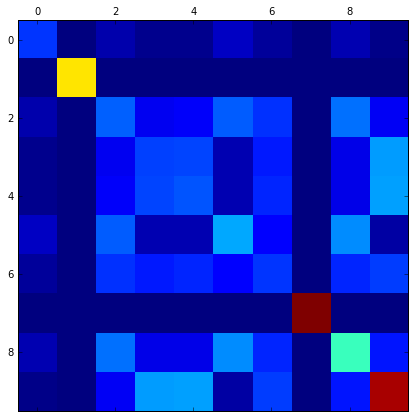

In [74]:
plt.matshow(aij)
plt.show()

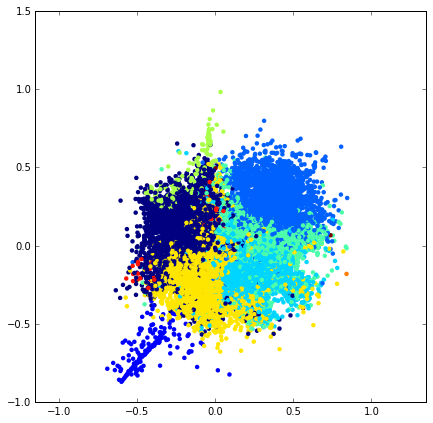

In [75]:
plt.scatter(x[:,0],x[:,1],c=ni[:], linewidth='0')
plt.axes().set_aspect('equal','datalim')
plt.show()

In [125]:
cij = aij> 0.1
cgraph=csg.csgraph_from_dense(cij, null_value=False)
cc=csg.connected_components(cgraph)
print cc[0]

4


In [126]:
macro = []
imacro = np.ones(ngrid,int)*-1
for i in xrange(cc[0]):
    mci = np.zeros(0,int)
    for j in xrange(ncls):
        if cc[1][j] == i:
            mci = np.union1d(mci, lcls[j])
            imacro[lcls[j]] = i
    macro.append(mci)

In [127]:
si = np.sqrt(np.exp(pi-pi.max()))

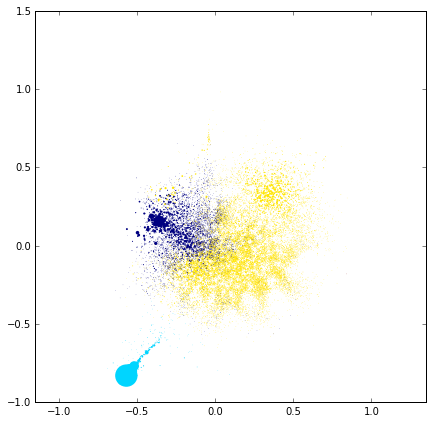

In [128]:
plt.scatter(x[:,0],x[:,1],c=imacro, s=(0.2+si*500), linewidth='0')
plt.axes().set_aspect('equal','datalim')
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


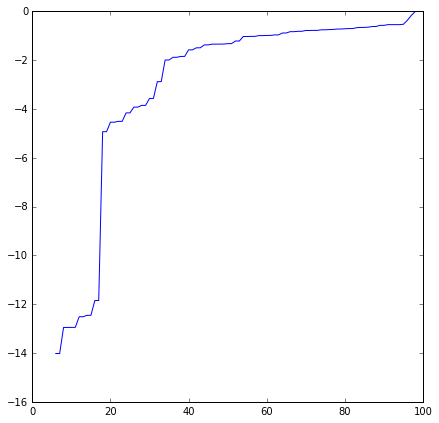

In [106]:
plt.plot(np.log10(np.sort(aij.flatten())))
plt.show()

In [53]:
imacro

array([0, 1, 2, ..., 3, 0, 3])

In [54]:
gij.diagonal()

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])